In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type',
            'aspiration','num-of-doors','body-style', 'drive-wheels',
            'engine-location', 'wheel-base','length', 'width',
            'height','curb-weight','engine-type','num-of-cylinders',
            'engine-size','fuel-system','bore','stroke','compression-ratio',
            'horsepower','peak-rpm','city-mpg', 'highway-mpg','price']
cars = pd.read_csv('imports-85.data',names=col_names)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Appear to be missing values in the normalized-loss column

Target column: Price (last column)

In [4]:
# Numeric columns
num_cols = cars.select_dtypes([int, float]).columns
num_cols

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [6]:
# Missing values were originally represented with ?, replaced with nan
cars = cars.replace(r'?',np.nan)
# Object type columns that should be changed to numeric
num_change = ['bore','stroke','horsepower','peak-rpm',
              'price','normalized-losses']
cars[num_change] = cars[num_change].astype(float)

In [8]:
# Dropping these because compression ratio is a function of stroke and bore
cars = cars.drop(columns=['bore','stroke','symboling'])
# Dropping observations where the price (target is missing)
cars = cars.dropna(subset=['price'])

In [9]:
# Selecting numeric columns
numeric_columns = cars.select_dtypes([int,float]).columns
# Imputing the means of numeric columns
cars[numeric_columns] = cars[numeric_columns].fillna(cars[numeric_columns].mean())

In [10]:
# No null values
cars[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 13 columns):
normalized-losses    201 non-null float64
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-size          201 non-null int64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-null float64
city-mpg             201 non-null int64
highway-mpg          201 non-null int64
price                201 non-null float64
dtypes: float64(9), int64(4)
memory usage: 22.0 KB


In [11]:
# Selecting only the numeric features
X = cars.loc[:,numeric_columns]
y = X['price']

# Normalizing cols
X_norm = (X - X.min()) / (X.max()-X.min())
X_norm= X_norm.drop(columns=['price'])
y_norm = y

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(train_col,tar_col,df,*n):
    '''
    Function that takes a single training column, a single target column
    the dataframe containing the training data and the k used
    
    1. Splits the training and target data into two equal parts
    2. Then calculates and returns the RMSE for each k value
    '''
    #This method was used to split because different values are selected each run
    Xtr,Xte,ytr,yte = train_test_split(df[[train_col]],tar_col,train_size = .75)
    k_rmse = {}
    for i in n:
        knn = KNeighborsRegressor(i)
        knn.fit(Xtr,ytr)
        predictions = knn.predict(Xte)
        rmse = mean_squared_error(yte,predictions) ** (1/2)
        k_rmse[i] = rmse
    return k_rmse

In [127]:
# Using the above function measure RMSE with each column
cols = {}
for col in X_norm.columns:
    cols[str(col)]= knn_train_test(col,y_norm,X_norm,3,5,7,9)

In [128]:
# Looping through the previously created dictionary of RMSE values
# to find the minimum RMSE value by column
avgs = {}
for i in cols:
    avgs[i] = np.mean(list(cols[i].values()))
# Sorting the dictionary by the values and appending it to a list for later use
sorted_avgs = []
for i in sorted(avgs,key=avgs.get):
    sorted_avgs.append(i)
    
sorted_avgs

['horsepower',
 'engine-size',
 'curb-weight',
 'width',
 'city-mpg',
 'highway-mpg',
 'wheel-base',
 'length',
 'compression-ratio',
 'peak-rpm',
 'normalized-losses',
 'height']

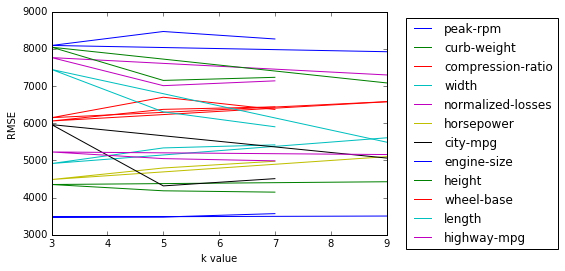

In [15]:
# Plotting the performance of Kvalues by column
%matplotlib inline

for k,v in cols.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    
plt.legend(cols.keys(),bbox_to_anchor=(1.04,1), loc="upper left")

In [148]:
def knn_train_test_multi(train_col,tar_col,*n):
    '''
    Function that takes a single training column, a single target column
    the dataframe containing the training data and the k used
    
    1. Splits the training and target data into two equal parts
    2. Then calculates and returns the RMSE for each k value
    
    ***This function works for mutliple features
    '''
    #This method was used to split because different values are selected each iteration
    Xtr,Xte,ytr,yte = train_test_split(train_col,tar_col,train_size = .75)
    k_rmse = {}
    for i in n:
        knn = KNeighborsRegressor(i)
        knn.fit(Xtr,ytr)
        predictions = knn.predict(Xte)
        rmse = mean_squared_error(yte,predictions) ** (1/2)
        k_rmse[i] = rmse
    return k_rmse

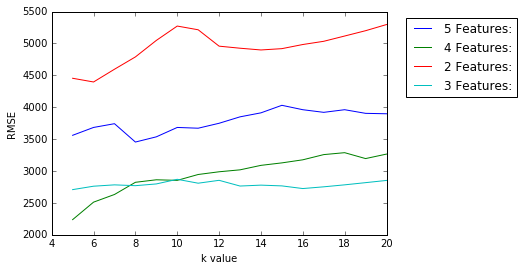

In [151]:
RMSEs = {}
# Creating a dictionary: number of features is the key, the values are a dictionary of RMSEs by k values
for i in range(2,6):
    RMSEs[str(i)+' Features:'] = knn_train_test_multi(X_norm[sorted_avgs[:i]], y_norm,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20)
    
# Plotting in the same cell to better visualize changes of different runs
for k,v in RMSEs.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y,label='{}'.format(k))
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(RMSEs.keys(),bbox_to_anchor=(1.04,1), loc="upper left")

In [133]:
RMSEs

{'2 Features:': {5: 2586.3339474714276,
  6: 2694.390402901218,
  7: 2772.9647732803137,
  8: 2875.0401278103245,
  9: 2928.8151703970834,
  10: 2963.4330582593416,
  11: 3115.790003666067,
  12: 3300.618396310978,
  13: 3250.2437756620416,
  14: 3222.777676132797,
  15: 3180.492931486111,
  16: 3238.8851490374004,
  17: 3303.727763874874,
  18: 3377.5835066162413,
  19: 3452.5480401872273,
  20: 3426.9371293731774},
 '3 Features:': {5: 3975.938058656662,
  6: 3529.377719688741,
  7: 3799.0505786208705,
  8: 3880.552271715607,
  9: 3911.9204079197234,
  10: 3711.6590257103703,
  11: 3669.64449415725,
  12: 3566.869928848628,
  13: 3554.802986214155,
  14: 3622.106845124671,
  15: 3626.3457356078475,
  16: 3712.988360620038,
  17: 3784.3873679091207,
  18: 3846.1748348224874,
  19: 3914.497286480866,
  20: 3913.0656560275543},
 '4 Features:': {5: 2719.441723128149,
  6: 2912.524484641862,
  7: 3056.6744105613984,
  8: 3170.5867098796075,
  9: 3270.0833493345785,
  10: 3404.1022612862434